### Carregando imagem e transformando em um tensor

In [60]:
import torchvision.transforms as transforms
from PIL import Image

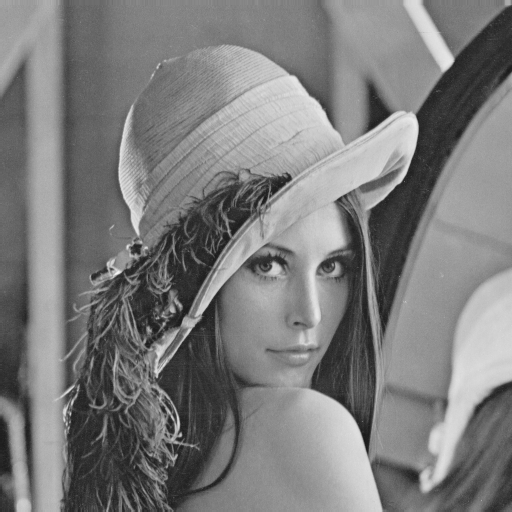

In [61]:
lenna = Image.open("Pictures/Lenna.png").convert('L')
lenna

In [62]:
type(lenna)

PIL.Image.Image

In [63]:
transform = transforms.Compose([
    transforms.Resize((244, 244)),
    transforms.ToTensor(),
    transforms.Normalize((.5), (.5))
])

lenna_tensor = transform(lenna).unsqueeze(0)
lenna_tensor.shape

torch.Size([1, 1, 244, 244])

### Criando arquitetura da rede neural

In [64]:
import torch
import torch.nn as nn

class CNN_MM3(nn.Module):
    def __init__(self):
        super(CNN_MM3, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=1)
        self.avg_pool = nn.AvgPool2d(kernel_size=2, stride=2)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.avg_pool(x)
        return x

In [65]:
import torch
import torch.nn as nn

class CNN_MM5(nn.Module):
    def __init__(self):
        super(CNN_MM5, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=5, stride=1, padding=1)
        self.avg_pool = nn.AvgPool2d(kernel_size=5, stride=2)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.avg_pool(x)
        return x

In [66]:
import torch
import torch.nn as nn

class CNN_MM7(nn.Module):
    def __init__(self):
        super(CNN_MM7, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=7, stride=1, padding=1)
        self.avg_pool = nn.AvgPool2d(kernel_size=7, stride=2)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.avg_pool(x)
        return x

In [67]:
import torch
import torch.nn as nn

class CNN_MM9(nn.Module):
    def __init__(self):
        super(CNN_MM9, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=9, stride=1, padding=1)
        self.avg_pool = nn.AvgPool2d(kernel_size=9, stride=2)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.avg_pool(x)
        return x

In [68]:
net_3 = CNN_MM3()
net_5 = CNN_MM5()
net_7 = CNN_MM7()
net_9 = CNN_MM9()

### Aplicando Convolução na imagem

In [69]:
with torch.no_grad():
    output_3 = net_3(lenna_tensor)
    output_5 = net_5(lenna_tensor)
    output_7 = net_7(lenna_tensor)
    output_9 = net_9(lenna_tensor)

In [70]:
import matplotlib.pyplot as plt
import numpy as np

### Plotando a Imagem

##### Kernel Size #3

In [71]:
def plot_image(output):
    feature_map = output[0, 0].detach().numpy()

    # Normalizando o mapa de características
    feature_map -= feature_map.min()
    feature_map /= feature_map.max()

    # Gerando um mapa de calor
    heatmap = np.uint8(255 * feature_map)

    # Visualizando o mapa de calor
    plt.imshow(heatmap)
    plt.show()

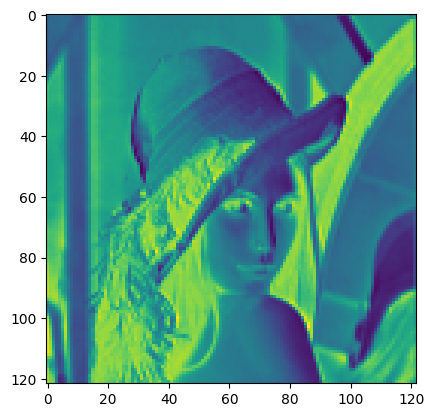

In [72]:
plot_image(output_3)

##### Kernel Size #5

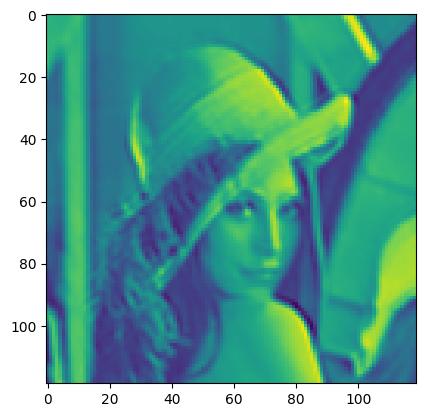

In [73]:
plot_image(output_5)

##### Kernel Size #7

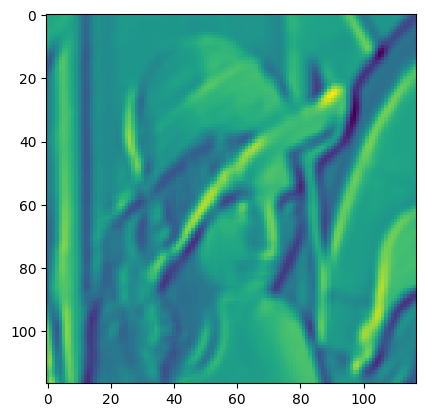

In [74]:
plot_image(output_7)

##### Kernel Size #9

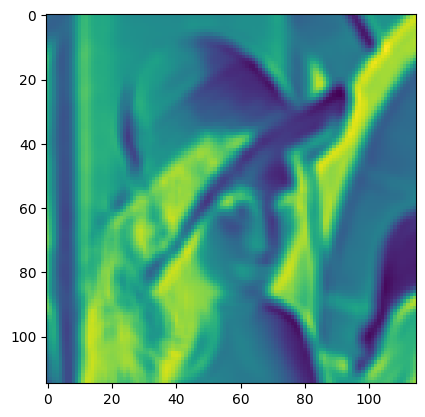

In [75]:
plot_image(output_9)